# <font color="blue"> [기계학습 5W] 군집화 실습 </font>

2020년 2학기, 광운대학교, 기계학습

> #### 레이블 데이터가 없는 경우 사용되는 기계학습 방법인 비지도 학습 (군집화) 알고리즘을 실습한다. <br/>
> #### 학습 알고리즘은 아래와 같이 3가지 이다.
>> K-means clustering <br/>
>> Hierarchical clustering <br/>
>> DBSCAN clustering

## 군집화(Clustering) 환경 설정

In [93]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import collections
import mglearn
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings(action='ignore') 

random.seed(2020)


## 인공 데이터

 1. Well-seperated dataset
 2. Seperated dataset
 3. Two moon



In [94]:
# 데이터 정규화
def standardization(Data):
    Input = ((Data[['X', 'Y']] - np.mean(Data[['X', 'Y']], axis=0)) / np.std(Data[['X', 'Y']], axis=0))
    return(pd.concat([Input, Data['Class']], axis=1))

# 데이터 로드
WellSeparated = standardization(pd.read_csv('datasets_for_clustering/well-separated dataset.csv'))
Twomoon = standardization(pd.read_csv('datasets_for_clustering/Twomoon dataset.csv'))
Seperated = standardization(pd.read_csv('datasets_for_clustering/Seperated dataset.csv'))

Artificial_Dataset={'WellSeparated':WellSeparated,  'Twomoon': Twomoon,'Seperated':Seperated}

# 데이터 요약정보 프린트
def Data_Info(Data,NAME):
    print(NAME ,": ",np.shape(Data)[0],"/ Class : ",len(collections.Counter(np.array(Data)[:,2])))

print("각각의 2차원의 데이터 갯수는 아래와 같음")
for i in range(len(Artificial_Dataset)):
    Data_Info(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])
    

각각의 2차원의 데이터 갯수는 아래와 같음
WellSeparated :  500 / Class :  5
Twomoon :  600 / Class :  2
Seperated :  600 / Class :  3


In [95]:
Data = Artificial_Dataset[list(Artificial_Dataset.keys())[1]]
Data['X']

0      1.156436
1      1.215074
2      1.406598
3      1.217140
4      0.924886
         ...   
595   -0.848963
596   -0.270449
597   -1.263236
598   -0.673867
599   -1.033761
Name: X, Length: 600, dtype: float64

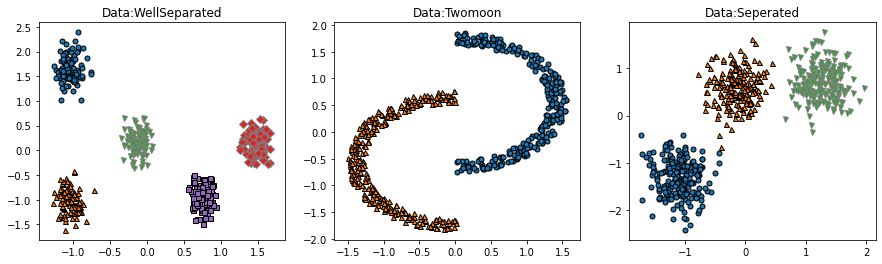

In [96]:
# 산점도 가시화
def Simple_Scatter(i, Name):
    Data = Artificial_Dataset[list(Artificial_Dataset.keys())[i]]
    G = sns.jointplot(x = 'X', y = 'Y', data = Data, kind='scatter', hue = "Class")
    G.fig.suptitle("Data : " + Name, fontsize = 10, color = 'black', alpha = 0.9)

# 가상의 데이터셋 3가지 그래프
fig, axes = plt.subplots(1,3,figsize=(15,4))
for i in range(len(Artificial_Dataset)):
    Data = Artificial_Dataset[list(Artificial_Dataset.keys())[i]]
    mglearn.discrete_scatter(Data['X'], Data['Y'], Data['Class'], ax=axes[i], s=5)
    axes[i].set_title("Data:" + list(Artificial_Dataset.keys())[i])

## K-Means clustering

### 1. K-Means 알고리즘 학습 예시

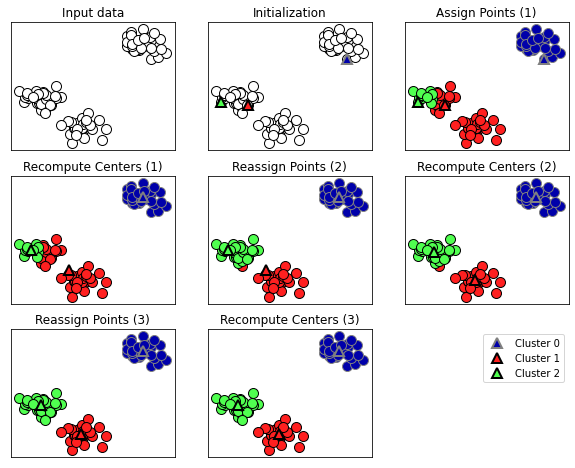

In [97]:
mglearn.plots.plot_kmeans_algorithm()

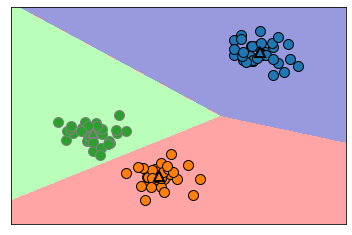

In [98]:
# K-Means 에 따라 학습된 decision boundary 가시화
mglearn.plots.plot_kmeans_boundaries()

In [100]:
# K-Means 클러스터링 함수 실행 후 차트 가시화
def k_Means_Plot(Data, Select_k, NAME, Init_Method = 'k-means++', Num_Init=10):
    Data2 = Data[['X', 'Y']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        Kmeans_Clustering = KMeans(n_clusters=i, init=Init_Method, random_state=2020, n_init=Num_Init)
        Kmeans_Clustering.fit(Data2)
        mglearn.discrete_scatter(Data2['X'], Data2['Y'], Kmeans_Clustering.labels_, ax=axes[i - 2], s=5)
        mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0], 
                                 Kmeans_Clustering.cluster_centers_[:, 1],
                                 list(range(i)), 
                                 markeredgewidth=3, 
                                 ax=axes[i - 2], s=10)
        Score = np.round(silhouette_score(Data2, Kmeans_Clustering.labels_),3)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))

### 2. K-Means 알고리즘, 초기 값 설정의 중요성 예시

> 초기 값을 잡는 임의의 횟수 -> 'n_init' = 1
>> Number of time the k-means algorithm will be run with different centroid seeds.

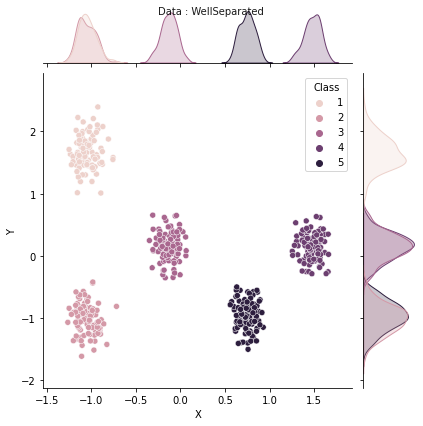

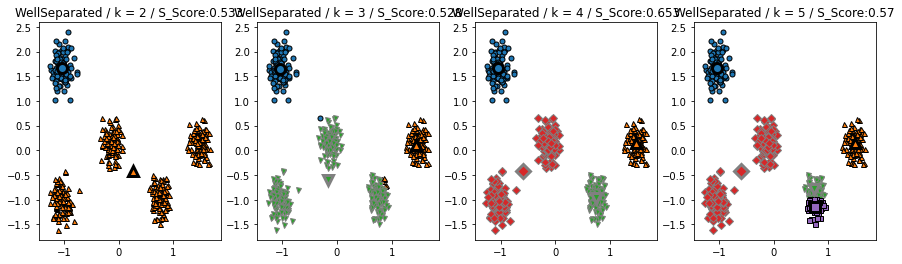

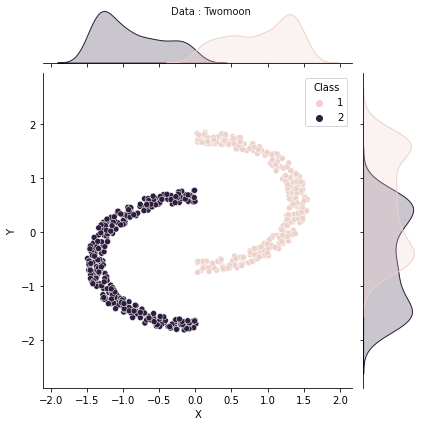

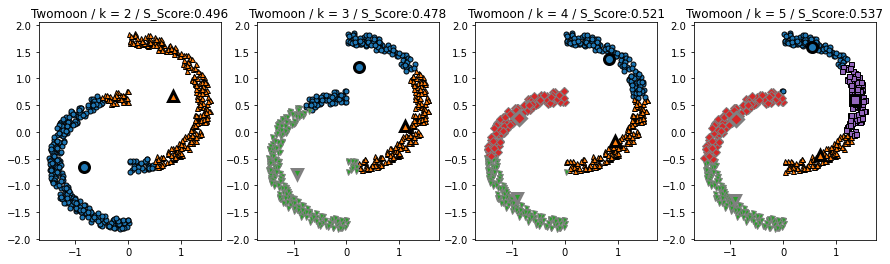

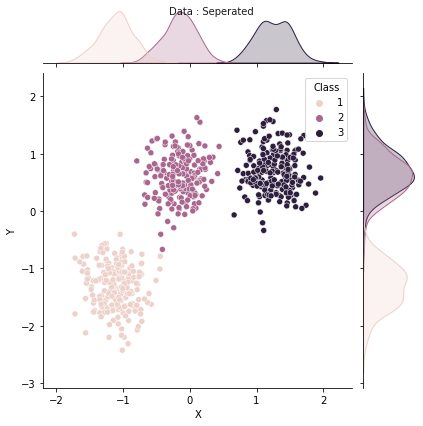

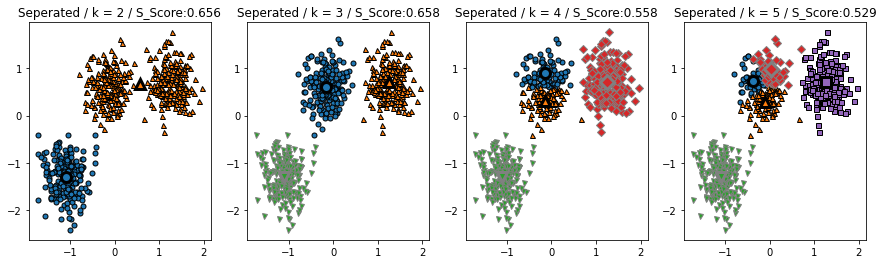

In [101]:
for i in range(0,3):
    Simple_Scatter(i, list(Artificial_Dataset.keys())[i])
    
    k_Means_Plot(Data = Artificial_Dataset[list(Artificial_Dataset.keys())[i]],
                 Select_k = range(2, 6),
                 NAME = list(Artificial_Dataset.keys())[i],
                 Init_Method='random',Num_Init=1)

> 초기 값을 잡는 임의의 횟수 -> 'n_init' = 10 설정

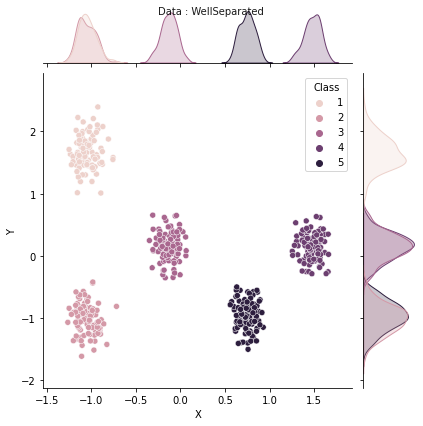

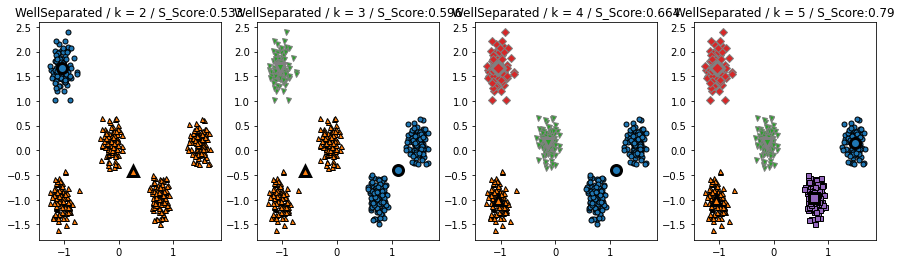

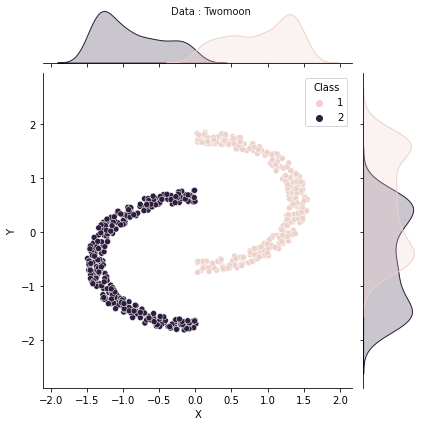

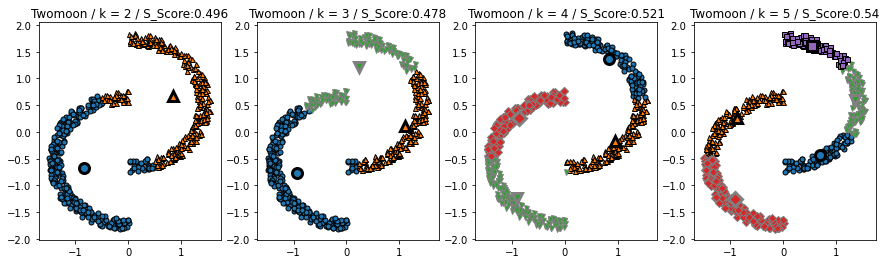

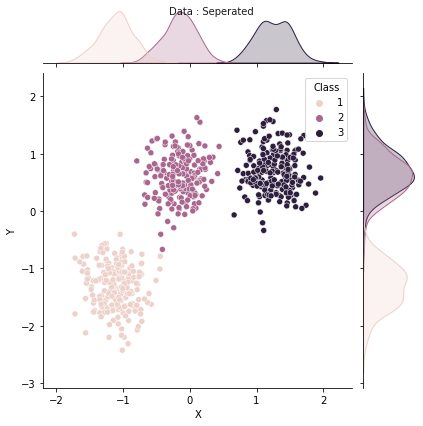

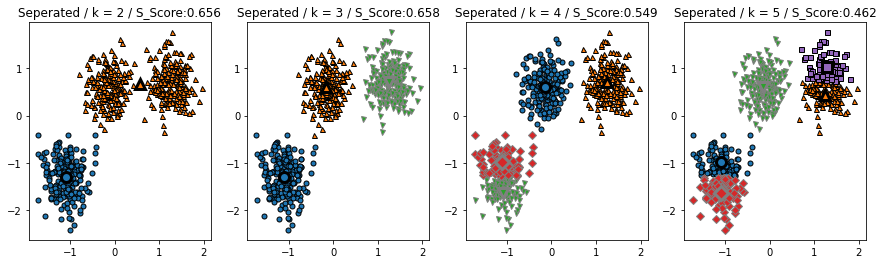

In [102]:
for i in range(0,3):
    Simple_Scatter(i, list(Artificial_Dataset.keys())[i])
    
    k_Means_Plot(Data = Artificial_Dataset[list(Artificial_Dataset.keys())[i]],
                 Select_k = range(2, 6),
                 NAME = list(Artificial_Dataset.keys())[i],
                 Init_Method='random',Num_Init=10)

### 3. K-means++ 사용하기

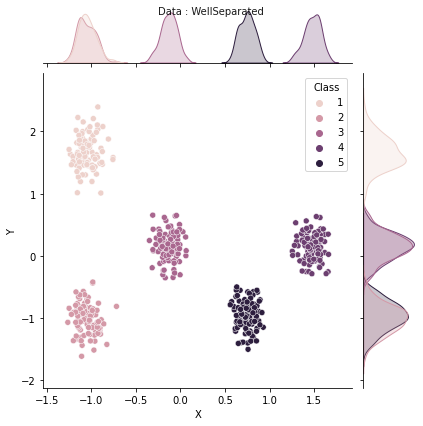

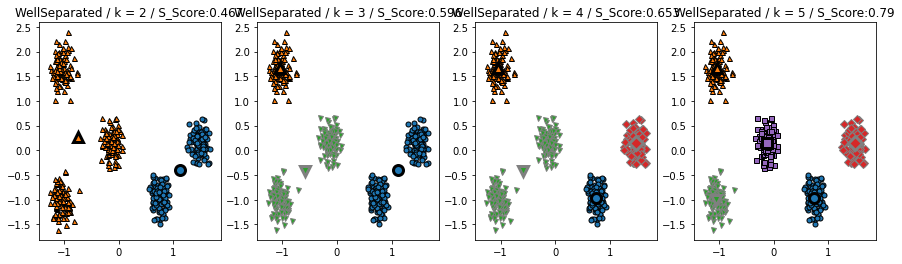

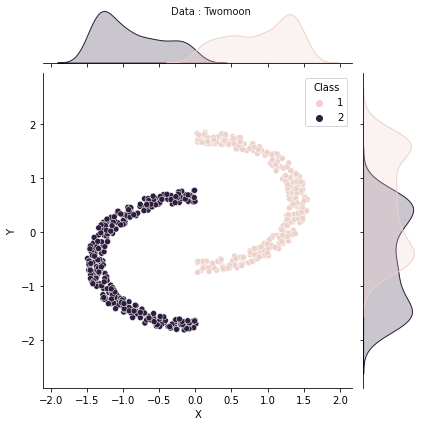

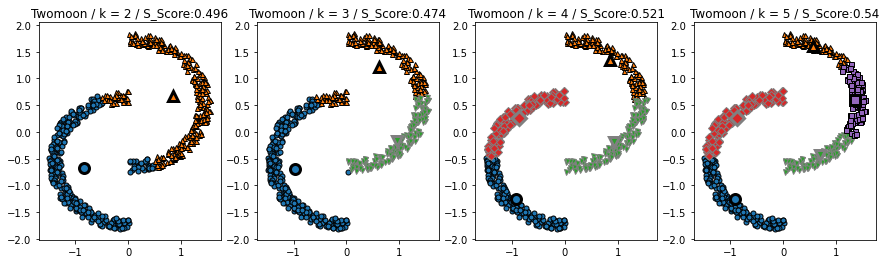

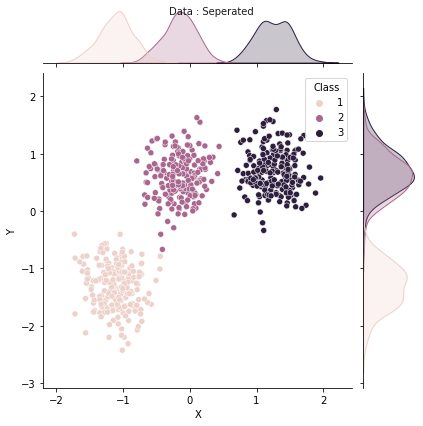

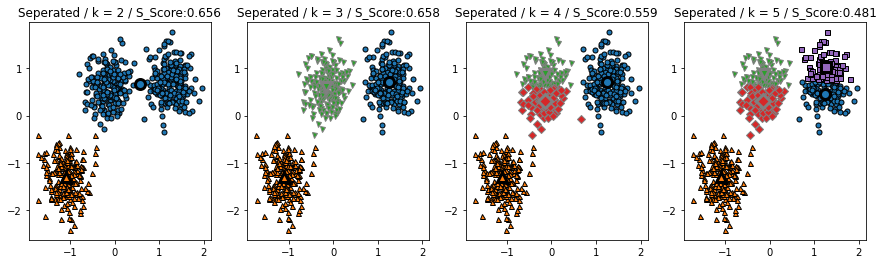

In [103]:
for i in range(0,3):
    Simple_Scatter(i, list(Artificial_Dataset.keys())[i])
    
    k_Means_Plot(Data = Artificial_Dataset[list(Artificial_Dataset.keys())[i]],
                 Select_k = range(2, 6),
                 NAME = list(Artificial_Dataset.keys())[i],
                 Init_Method='k-means++',Num_Init=1)

## Herarchical clustering

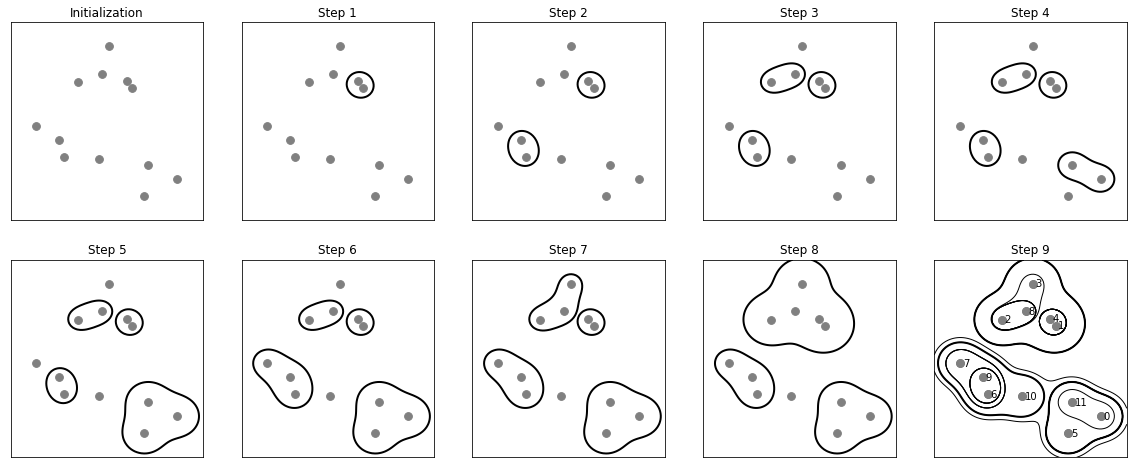

In [104]:
mglearn.plots.plot_agglomerative_algorithm()
mglearn.plots.plot_agglomerative()

#### Well seperated dataset을 통해 complete linkage에 대한 dendrogram 시각화

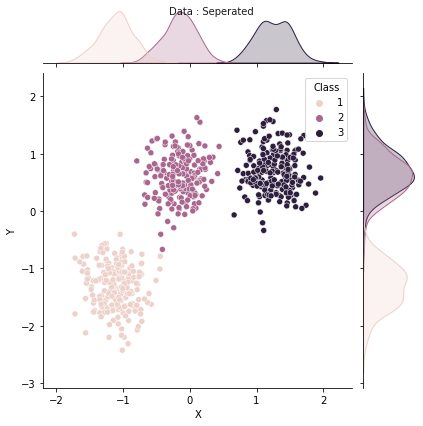

In [105]:
# Well seperated dataset
Simple_Scatter(2, list(Artificial_Dataset.keys())[2])

def Fixed_Dendrogram(Data, Num_of_p, Full_Use):
    Linkage_Matrix = linkage(Data,'complete')
    if(Full_Use == True):
        Num_of_p = np.shape(Data)[0]
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
    else:
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Linkage_Matrix,
        truncate_mode = 'lastp',  
        p = Num_of_p, 
        leaf_rotation = 90.,
        leaf_font_size = 12.,
        color_threshold = 'default'
    )
    plt.show()

#### 전체 관측치에 대해 모든 leaf node 생성

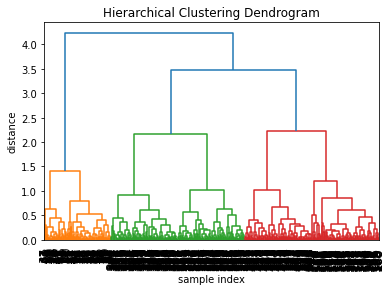

In [106]:
Fixed_Dendrogram(WellSeparated[['X','Y']], -1, True) # -1: nomeaningful value

#### 20 cluster만 생성

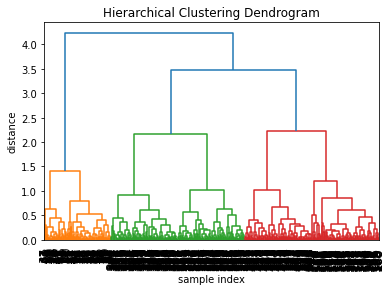

In [107]:
Fixed_Dendrogram(WellSeparated[['X','Y']], 20, True)

In [108]:
#### 10 cluster만 생성

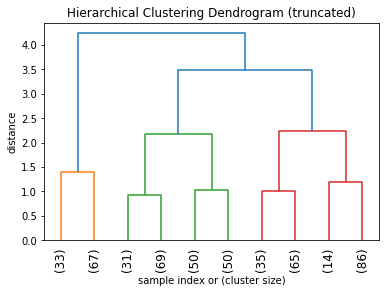

In [109]:
a = Fixed_Dendrogram(WellSeparated[['X','Y']], 10, False)

In [110]:
def Hclust_Plot(Data,Select_k,NAME):
    Data2 = Data[['X', 'Y']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters=i,linkage="complete")
        P_Labels = H_Clustering.fit_predict(Data2)
        mglearn.discrete_scatter(Data2['X'], Data2['Y'], P_Labels, ax=axes[i - 2], s=5)        
        axes[i - 2].set_title("Data:" + NAME + ' / k = ' + str(i))
        Score=np.round(silhouette_score(Data2,P_Labels),3)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))

### HC의 예측 결과 가시화

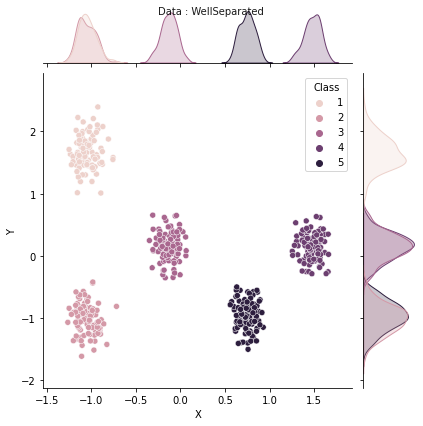

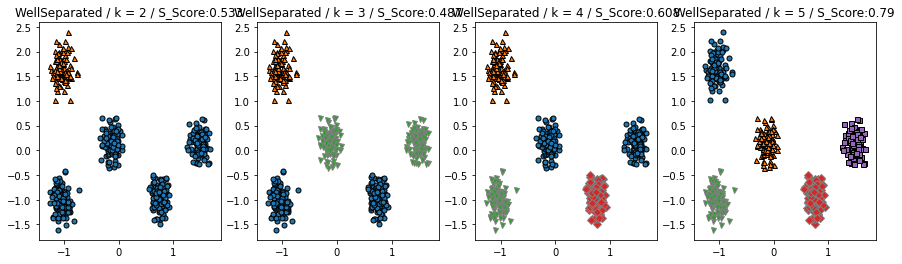

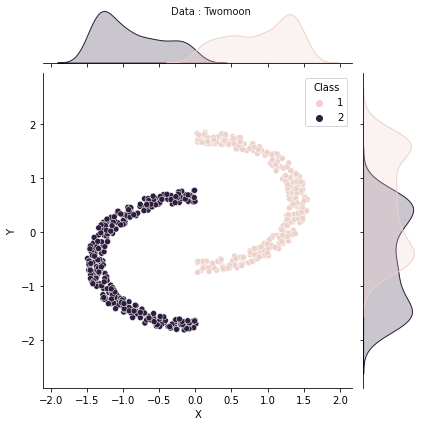

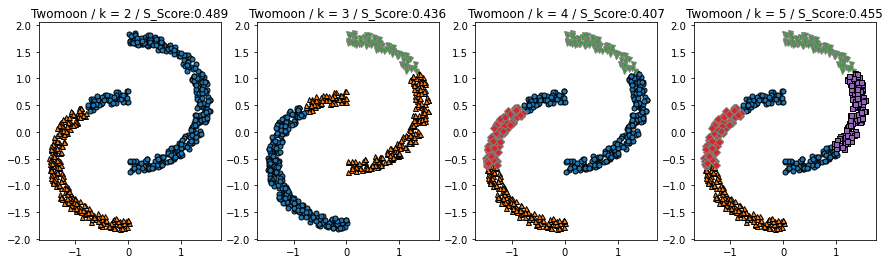

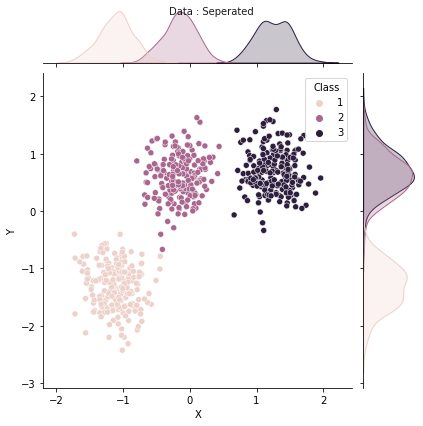

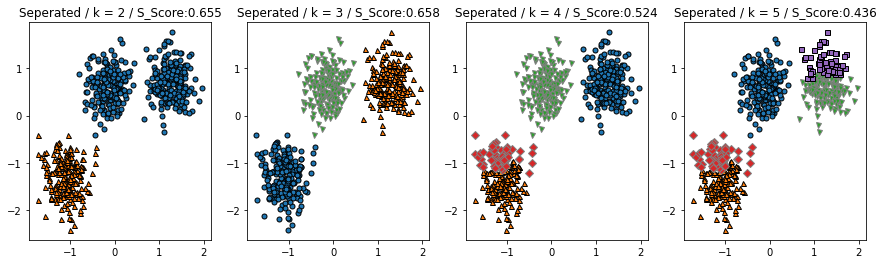

In [112]:
for i in range(0,3):
    Simple_Scatter(i, list(Artificial_Dataset.keys())[i])
    Hclust_Plot(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],
                range(2, 6), list(Artificial_Dataset.keys())[i])

<font color = 'red'> Two moon datset 에 대해서 여전히 군집화 결과가 좋지 않음을 알 수 있다. </font>

## DBSCAN clustering

DBSCAN 알고리즘 설명 가시화

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


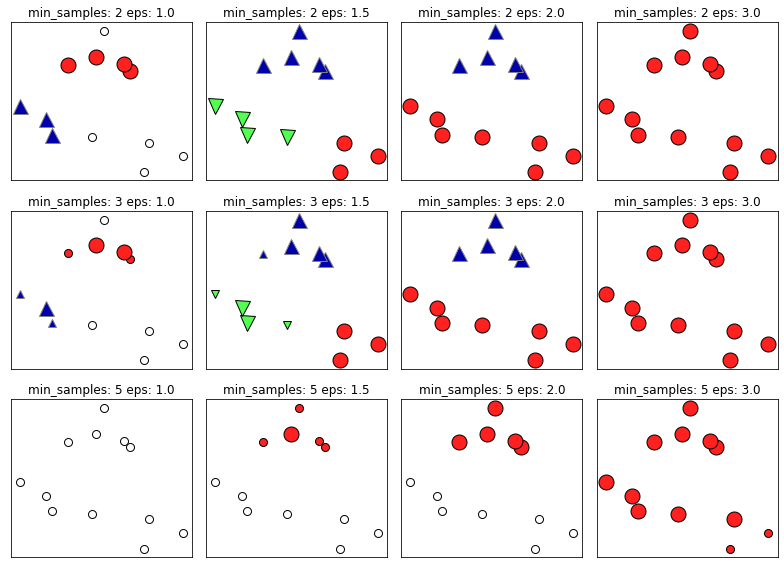

In [113]:
mglearn.plots.plot_dbscan()

> 아래 차트를 보면, 앞의 두 알고리즘 K-means, HC 보다 잘 동작하는 것을 알 수 있다.

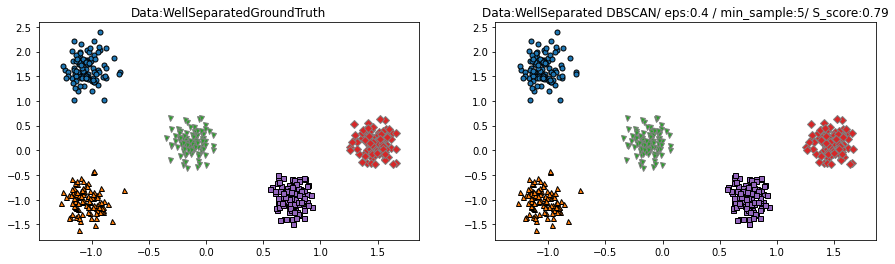

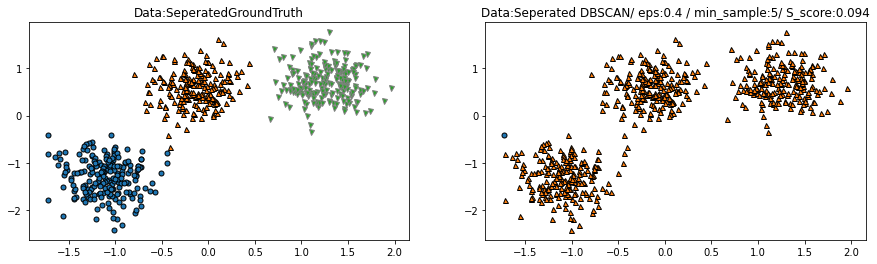

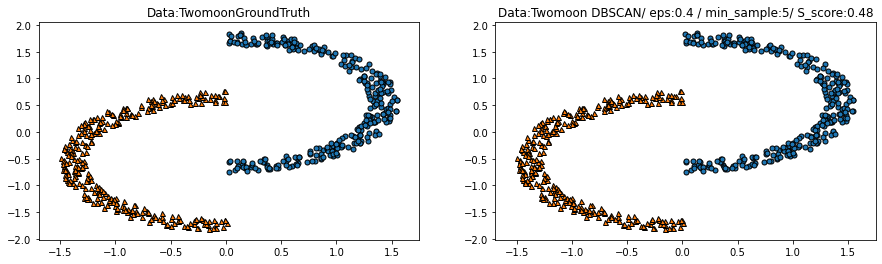

In [114]:
def DBSCAN_Plot(Data,NAME,min_samples=5,eps=0.4):
    Data2 = Data[['X', 'Y']]
    Append_k_Means_Results = list()
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    Set_DBSCAN_Hyperparameter=DBSCAN(min_samples=min_samples,eps=eps)
    Results = Set_DBSCAN_Hyperparameter.fit_predict(Data2)
    Score=np.round(silhouette_score(Data2,Results),3)
    mglearn.discrete_scatter(Data2['X'], Data2['Y'], Data['Class'], ax=axes[0], s=5)
    axes[0].set_title("Data:" + NAME + 'GroundTruth')    
    mglearn.discrete_scatter(Data2['X'], Data2['Y'], Results, ax=axes[1], s=5)
    axes[1].set_title("Data:" + NAME + ' DBSCAN/ eps:'+str(eps)+' / min_sample:'+str(min_samples)+'/ S_score:'+str(Score))


DBSCAN_Plot(Data=WellSeparated,NAME="WellSeparated")
DBSCAN_Plot(Data=Seperated,NAME="Seperated")
DBSCAN_Plot(Data=Twomoon,NAME="Twomoon")

> DBSCAN의 hyperparmeters를 튜닝해보자.
>> 1. Seperated의 경우 eps가 0.35이상이면 ground truth의 cluster2개가 뭉쳐짐을 확인 (silhouette score 낮아짐)
>> 2. Best hyper-parameter는 {eps = 0.3, min_smaple = 7}, {eps = 0.3, min_smaple = 5}

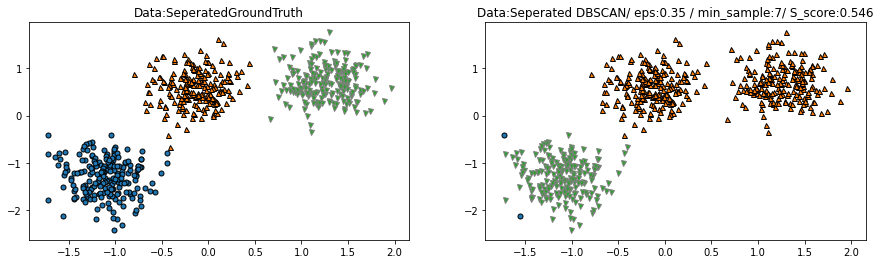

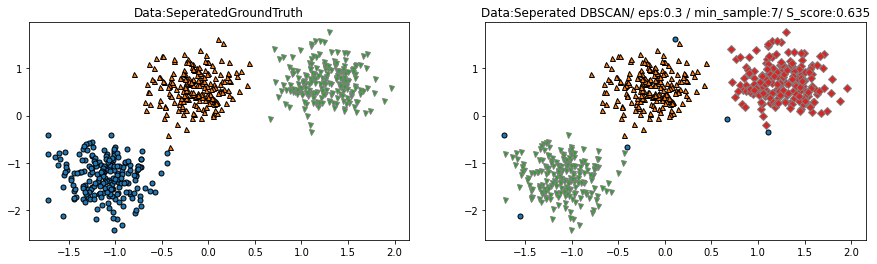

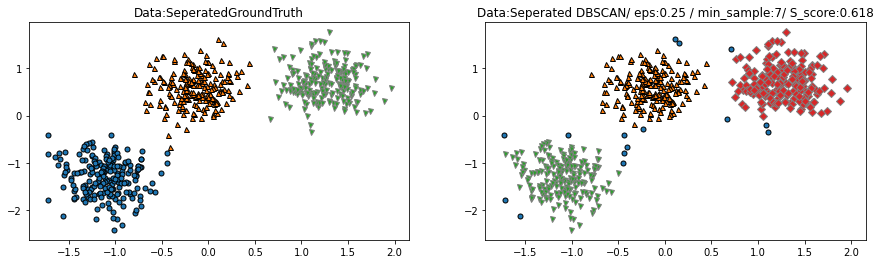

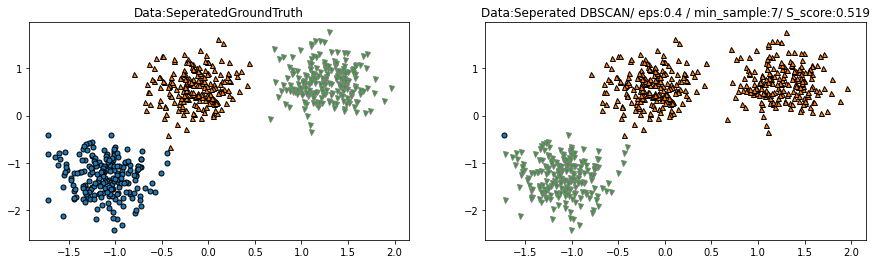

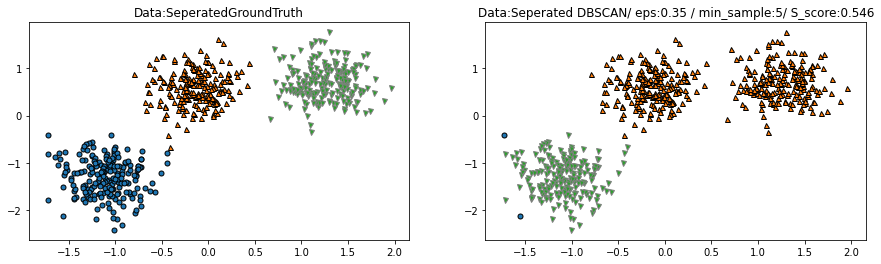

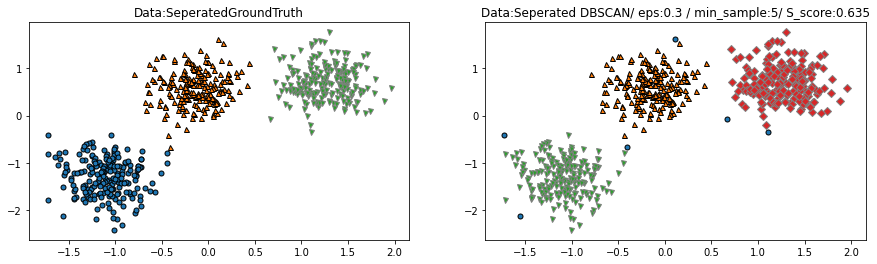

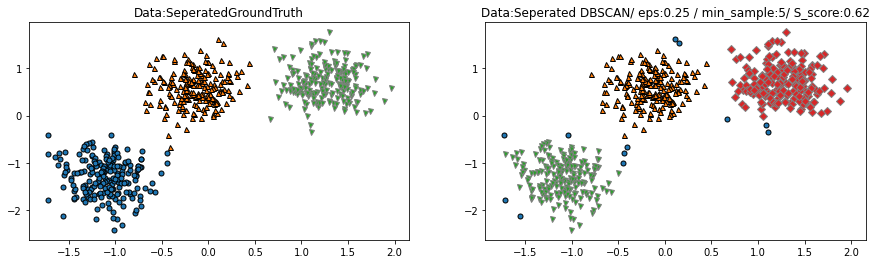

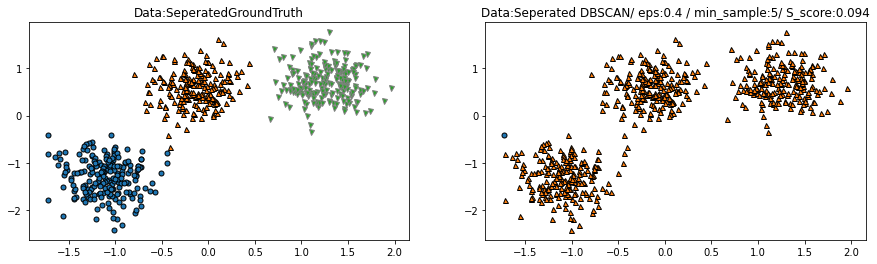

In [115]:
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=7,eps=0.35)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=7,eps=0.30)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=7,eps=0.25)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=7,eps=0.40)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=5,eps=0.35)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=5,eps=0.30)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=5,eps=0.25)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=5,eps=0.40)

## DBSCAN 분석 예제

#### 라이브러리 로드

In [116]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import RobustScaler

#### 데이터 생성

In [118]:
centers = [[0.8, 0.95], [-0.95, -0.8], [1, -.95], [-.98, 1], [-.5,1],
        [-.2,-.1], [.95,-.2], [-.2,-.9], [-.08,.7]]
X, labels_true = make_blobs(n_samples=850, centers=centers,
                            cluster_std=0.16, random_state=2020)
X = RobustScaler().fit_transform(X)

#### DBSCAN 군집화

> 이웃점 탐색 최대 반경 (epsilon)
>> 0.03 ~ 0.18, 0.03씩 증가

Hyperparameters: [ e: 0.03 , n: 10 ]
V-measure: 0.054
Silhouette score: -0.199


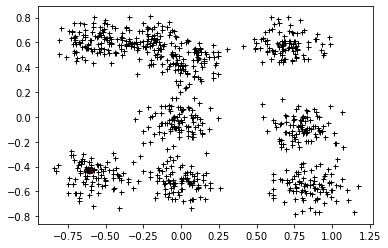

Hyperparameters: [ e: 0.06 , n: 10 ]
V-measure: 0.624
Silhouette score: 0.131


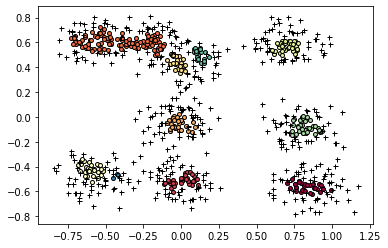

Hyperparameters: [ e: 0.09 , n: 10 ]
V-measure: 0.821
Silhouette score: 0.509


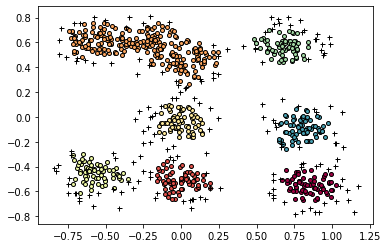

Hyperparameters: [ e: 0.12 , n: 10 ]
V-measure: 0.762
Silhouette score: 0.507


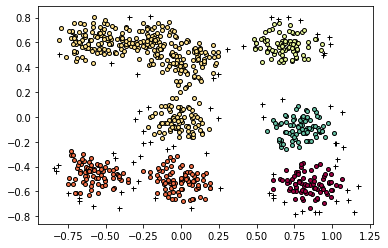

Hyperparameters: [ e: 0.15 , n: 10 ]
V-measure: 0.389
Silhouette score: 0.389


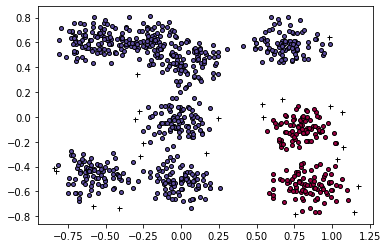

Hyperparameters: [ e: 0.18 , n: 10 ]
V-measure: 0.389
Silhouette score: 0.389


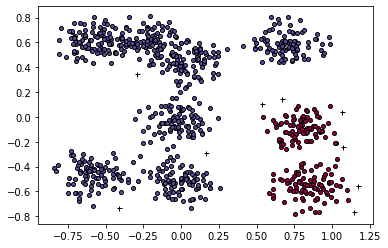

In [119]:
for i in range(1,7):
    
    # DBSCAN 하이퍼 파라미터 설정
    epsilon = round(i * 0.03, 2)
    no_of_sample = 10

    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")

    try:
        db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X)
        core_mask = np.zeros_like(db.labels_, dtype = bool)
        core_mask[db.core_sample_indices_] = True
        labels = db.labels_

        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Silhouette score: %0.3f" % metrics.silhouette_score(X, labels))
    except:
        pass
        
    unique_labels = set(labels) # 유일 label 추출
    colors = [plt.cm.Spectral(each) # 각 label 별 색 추출
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors): # index, 색정보 반복
        if k == -1:
            col = [0, 0, 0, 1] # black
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = X[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = X[class_member_mask & ~core_mask]
        plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()

> 반경내 이웃점의 최소한의 개수 (minimum points)
>> 2 ~ 10, 1씩 증가

Hyperparameters: [ e: 0.09 , n: 2 ]
V-measure: 0.605
Silhouette score: 0.109


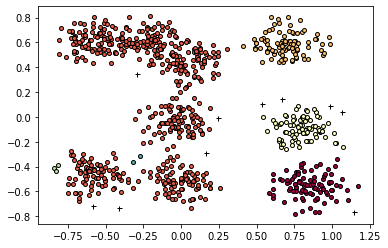

Hyperparameters: [ e: 0.09 , n: 3 ]
V-measure: 0.605
Silhouette score: 0.225


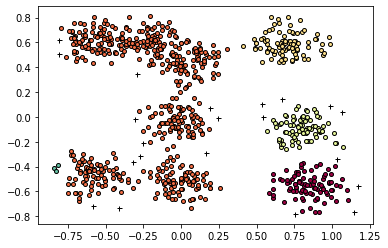

Hyperparameters: [ e: 0.09 , n: 4 ]
V-measure: 0.603
Silhouette score: 0.304


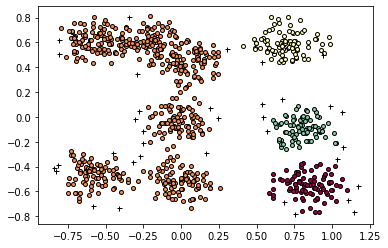

Hyperparameters: [ e: 0.09 , n: 5 ]
V-measure: 0.604
Silhouette score: 0.306


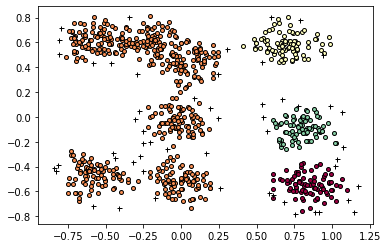

Hyperparameters: [ e: 0.09 , n: 6 ]
V-measure: 0.739
Silhouette score: 0.484


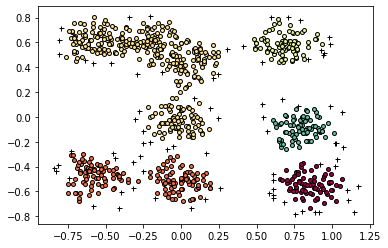

Hyperparameters: [ e: 0.09 , n: 7 ]
V-measure: 0.778
Silhouette score: 0.487


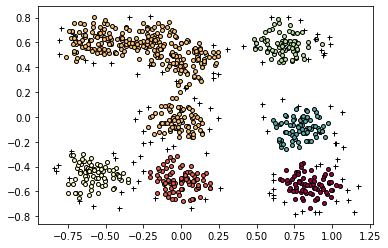

Hyperparameters: [ e: 0.09 , n: 8 ]
V-measure: 0.839
Silhouette score: 0.495


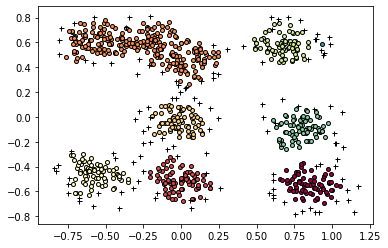

Hyperparameters: [ e: 0.09 , n: 9 ]
V-measure: 0.830
Silhouette score: 0.523


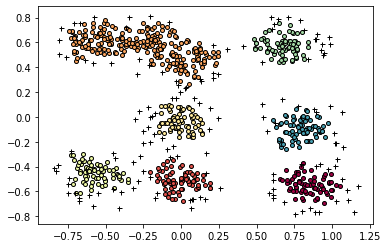

Hyperparameters: [ e: 0.09 , n: 10 ]
V-measure: 0.821
Silhouette score: 0.509


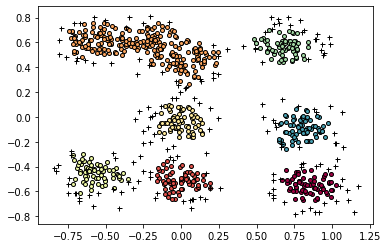

In [121]:
for i in range(1,10):
    
    # DBSCAN 하이퍼 파라미터 설정
    epsilon = 0.09
    no_of_sample = 1 + 1 * i

    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")

    try:
        db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X)
        core_mask = np.zeros_like(db.labels_, dtype = bool)
        core_mask[db.core_sample_indices_] = True
        labels = db.labels_

        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Silhouette score: %0.3f" % metrics.silhouette_score(X, labels))
    except:
        pass
        
    unique_labels = set(labels) # 유일 label 추출
    colors = [plt.cm.Spectral(each) # 각 label 별 색 추출
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors): # index, 색정보 반복
        if k == -1:
            col = [0, 0, 0, 1] # black
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = X[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = X[class_member_mask & ~core_mask]
        plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()